/tmp/ipykernel_85457/253828388.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{x:,.0f}'.replace(',', '.') for x in df['records'].unique()], rotation=45, ha="right")


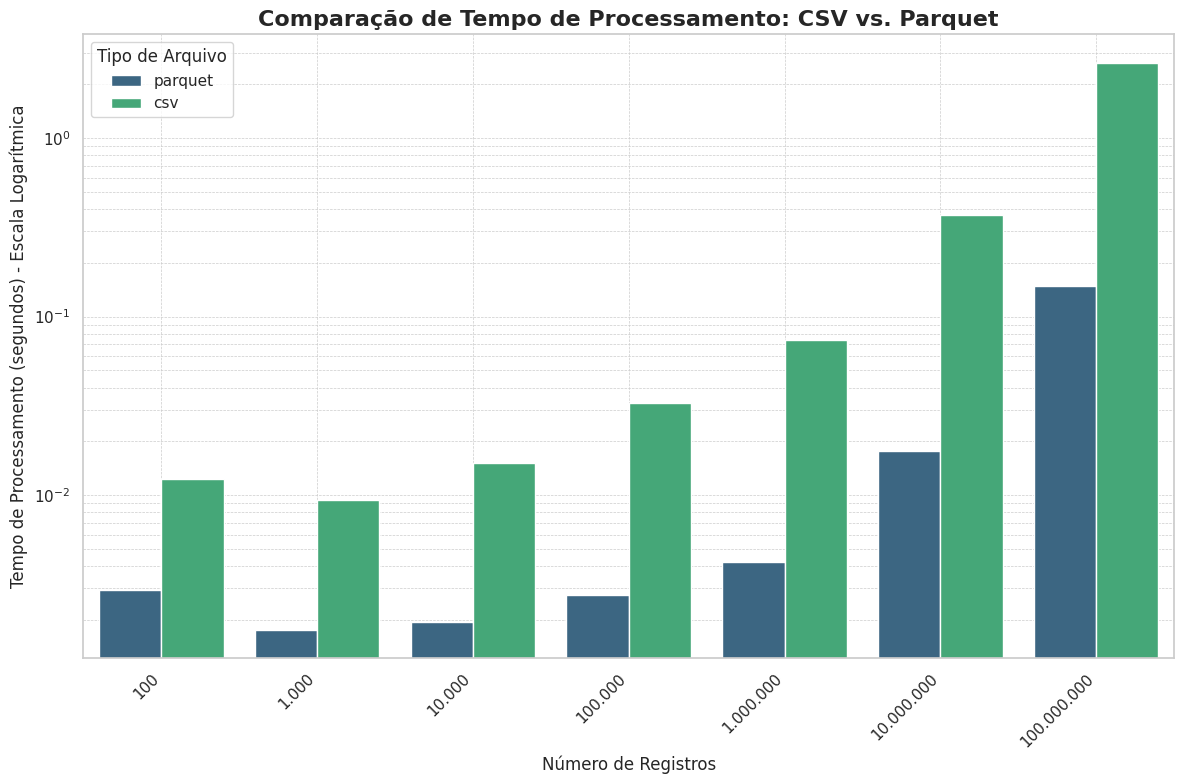

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler os dados para um DataFrame do Pandas
df = pd.read_csv('./results/duckdb.csv')

# Extrair o tipo de arquivo (parquet ou csv)
df['file_type'] = df['file'].apply(lambda x: x.split('.')[-1])

# Extrair o número de registros do nome do arquivo
df['records'] = df['file'].apply(lambda x: int(x.split('_')[-1].split('.')[0]))

# Configurar o estilo do gráfico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# Criar o gráfico de barras
ax = sns.barplot(data=df, x='records', y='time', hue='file_type', palette='viridis')

# Adicionar título e rótulos
plt.title('Comparação de Tempo de Processamento: CSV vs. Parquet', fontsize=16, fontweight='bold')
plt.xlabel('Número de Registros', fontsize=12)
plt.ylabel('Tempo de Processamento (segundos) - Escala Logarítmica', fontsize=12)

# Usar escala logarítmica para melhor visualização
ax.set_yscale('log')

# Melhorar os rótulos do eixo x para facilitar a leitura
ax.set_xticklabels([f'{x:,.0f}'.replace(',', '.') for x in df['records'].unique()], rotation=45, ha="right")

# Adicionar uma legenda clara
plt.legend(title='Tipo de Arquivo')

# Adicionar uma grade para facilitar a leitura dos valores
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Otimizar o layout
plt.tight_layout()

# Salvar o gráfico em um arquivo
plt.savefig('comparacao_csv_parquet.png', dpi=300)

plt.show()